<h1><b>MACHINE LEARNING PROJECT</b></h1>

<h2><b><i>Predicting Diabetes Progression Using Linear Regression Model</i></b></h2>

<p>The goal of this project is to use a machine learning model, LINEAR REGRESSION to predict the progression of diabetes one year after baseline. There are 10 independent variables that are used for the prediction of the disease progression namely -- age, sex, body-mass index, average blood pressure, and six blood serum measurements: low density lipoproteins (LDL or s1), high density lipoproteins (HDL or s2), total cholesterol (TC or s3), triglyceride (TG or s4), serum concentration of lamotrigine (LTG or s5) and glucose (GLU or s6) based on data of 442 patients. This data has been imported from Scikit-learn built in datasets and imported as pandas dataframe.</p>
<p>The data set has been splitted in to training set and test set. The training set is used for training the model. After the model is fitted on the training set, it is evaluated on both the training set and the test set by calculating the model's score, mean squared error (MSE) and R<sup>2</sup> score.</p>

<h2>Importing Libraries</h2>

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore


<h2>Loading Dataset</h2>

In [2]:
# Load the diabetes progression dataset into pandas dataframe
diabetes = load_diabetes()
dataset = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
dataset['Progression'] = diabetes.target  # Progression being the target variable

<h2>Studying the Dataset</h2>
<p>Data Preprocessing is an important part of machine learning model training. The data should be cleaned, checked for missing values and if there are any missing values, then these missing values should be replaced or removed from dataset to make the data ready for model training</p>
<h3><ul>
    <li>Printing Shape and Head of Dataset</li>
</ul></h3>

In [3]:
# Display the shape and head of dataset
print(dataset.shape, '\n')
dataset.head()

(442, 11) 



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


<p>Checking the size and shape of the dataframe. There are 442 rows (training examples) and 11 columns with 1 being the output response/target variable (disease progression one year after baseline). The remaining 10 columns are other 10 input features used for predicting the response variable. The 10 features are:
<ul>
    <li>AGE</li>
    <li>SEX</li>
    <li>BMI (Body mass index)</li>
    <li>BP (Blood pressure)</li>
    <li>S1 (Blood serum concentration 1): Total serum cholesterol (TC)</li>
    <li>S2 (Blood serum concentration 2): Low-density lipoproteins (LDL)</li>
    <li>S3 (Blood serum concentration 3): High-density lipoproteins (HDL)</li>
    <li>S4 (Blood serum concentration 4): Total cholesterol / HDL</li>
    <li>S5 (Blood serum concentration 5): Possibly log of serum triglycerides level (LTG)</li>
    <li>S6 (Blood serum concentration 6): Blood glucose level (GLU)</li>
    <li>Progression: Target variable representing the progression of diabetes one year after baseline</li>
</ul></p>

<h3><ul>
    <li>Checking for Missing or Null values</li>
</ul></h3>

In [4]:
# Checking for missing values in the dataset
dataset.isnull().sum()

age            0
sex            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
Progression    0
dtype: int64

<p> -> Since there are no missing values in the dataset, we can proceed with the splitting of data.
<br> But first, lets print the basic statistics and info for each feature in the dataset to get more insight.</p>

<h3><ul>
    <li>Printing Basic Statistics of Dataset</li>
</ul></h3>

In [5]:
# Printing the basic statistics of dataset
dataset.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


<p>This provides a summary of the basic statistics of the numerical columns in the dataset. The statistics it provides are defined below:</p>
<ul>
    <li><b>Count:</b> The number of non-missing values in each column.</li>
    <li><b>Mean:</b> The average value of the column.</li>
    <li><b>Standard Deviation (std):</b> A measure of the amount of variation or dispersion of the values in the column. </li>
    <li><b>Minimum (min):</b> The smallest value in the column.</li>
    <li><b>25th Percentile (25%):</b> The value below which 25% of the data falls. Also known as the first quartile (Q1).</li>
    <li><b>50th Percentile (50%)/Median:</b> The median value of the column. This is the value below which 50% of the data falls.</li>
    <li><b>75th Percentile (75%):</b> TThe value below which 75% of the data falls. Also known as the third quartile (Q3)</li>
    <li><b>Maximum (max):</b> The largest value in the column.</li>
</ul>

<h3><ul>
    <li>Printing Dataset Info</li>
</ul></h3>

In [6]:
# Printing the info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  Progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


<p>Checking the information about the dataframe which gives details about the number of columns, column names, the count of non-null values and their datatypes.</p>

<h2>Dataset Splitting into Training and Test Data</h2>

In [7]:
# Selecting the independent variable (X) and dependent variable (Y)
X = dataset.drop('Progression', axis=1)
Y = dataset['Progression']

# Splitting the dataset into 80/20 ratio of train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

<p> -> So now the dataset has been splitted into train and test data using sklearn train_test_split(), we can now train the linear regression model on the train data. The test data comprises 20% of the entire training set.</p>

<h2>Linear Regression Model</h2>
<h3><ul>
    <li>Instantiating the Model</li>
    <li>Fitting/Training the Model</li>
</ul></h3>

In [8]:
# Instantiating and Training the model on train data
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression()

<h3><ul>
    <li>Predicting the Result</li>
</ul></h3>

In [9]:
# Predicting the target variable (Diabetes Progression) using the test data
Y_pred = lr_model.predict(X_test)

<h3><ul>
    <li>Evaluating the model</li>
</ul></h3>
<h4><pre>    1. Calculating the Score of Model on Training Data</pre></h4>

In [10]:
# Printing the score of trained model on training data
lr_model.score(X_train, Y_train)

0.5279193863361498

<h4><pre>    2. Calculating the Score of Model on Test Data</pre></h4>

In [11]:
# Printing the score of trained model on test data
lr_model.score(X_test, Y_test)

0.4526027629719197

<p>The <b>score</b> measures how well the model explains the variance in the target variable. As indicated from the score above, the training score is slightly larger than the test score. This means that the model explains the variance more well in the training data than in the test data. Since the difference is not so large, the model is performing well and can be said to slightly overfit.</p>

<h4><pre>    3. Calculating the Mean Squared Error (MSE) of Model</pre></h4>

In [12]:
# Calculating the MSE of the model
MSE = mean_squared_error(Y_test, Y_pred)
print("MSE: ", MSE)

MSE:  2900.19362849348


<h4><pre>    4. Calculating the R<sup>2</sup> score of Model</pre></h4>

In [13]:
# Calculating the R2 score of the model
r2 = r2_score(Y_test, Y_pred)
print(f"R2: ", r2)

R2:  0.4526027629719197


<p><b>R squared score</b> represents how much variation in the response variable can be explained by the model we used to predict the response variable (same as model's score calculated above).
It compares the best fit line to a worse fitted line which is at the mean value of response variable, i.e. it takes the ratio of squared sum of residuals from the best fit line to the squared sum of residuals from the worse fit line. Larger the Rsquared value, better is the fit of our model.<br>

The <b>mean squared error (MSE)</b> is the mean of the squared difference in the actual response value from the predicted response value. It shows how close are the data points to the best fit line. Smaller the mean squared error, better is the fit of out model. </p>

<p>Both In sample Evaluation and Out of Sample Evaluation has been performed. In sample evaluation is performed by calculating the Rsquared value and mean squared error on the training set after the model gets trained on the train set. The out of sample evaluation is performed on the test set.</p>

<p> -> Here, the R<sup>2</sup> value for test data is less and the MSE is large. That means the model can't explain the variance much and the data points are much scattered from the best fit line. Let's analyze this through graphs.</p>

<h3><ul>
    <li>Visualizing the Model's Performance</li>
</ul></h3>
<h4><pre>     1. Scatter plot of Predicted and Actual values</pre></h4>

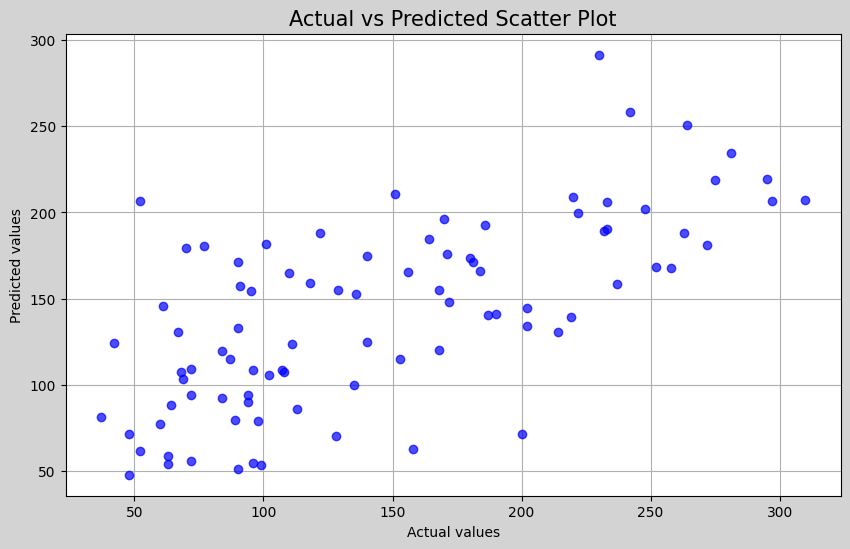

In [14]:
# Creating scatter plot of the predicted vs. actual values
plt.figure(figsize=(10, 6), facecolor='lightgray')
plt.scatter(Y_test, Y_pred, zorder=2, color='blue', alpha=0.7)
plt.title('Actual vs Predicted Scatter Plot', fontsize=15)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid(True, zorder=1)
plt.show()

<h4><pre>     2. Plotting the Regression Line of Predicted and Actual values</pre></h4>

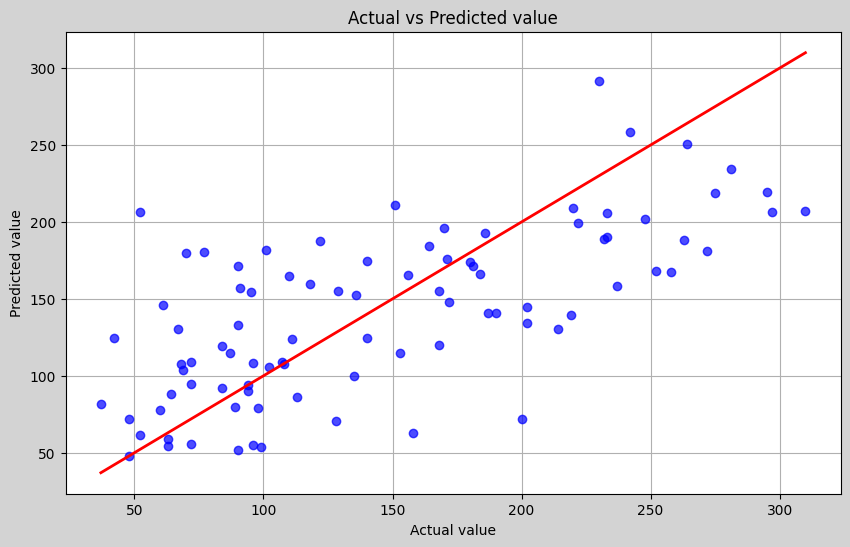

In [15]:
# Visualizing the model's performance by Regression Line
plt.figure(figsize=(10, 6), facecolor='lightgray')
plt.scatter(Y_test, Y_pred, color='blue', zorder=2, alpha=0.7)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual vs Predicted value')
plt.grid(True, zorder=1)
plt.show()

<p>Visualizing the model's performance with help of graphs is a good way to analyze the model's performance on the dataset.
As we can see from the above two graphs, the values are much scattered along the regression line and the mean squared error is also large i.e, data points are not close to the regression line. So the quantitative data is consistent with the graphical analysis.</p>
<p> -> This shows that the data is not properly cleaned and there should be more data preprocessing before predicting the result.</p>

<h2>Studying the Dataset More Deeply</h2>
<p>Since the previous result was not satisfactory, we are analyzing the dataset more deeply and try to reduce the mean squared error and improve the model's performance</p>
<h3><ul>
    <li>The Correlation Matrix</li>
</ul></h3>

In [16]:
correlation_matrix = dataset.corr()
correlation_matrix

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<p>The correlation matrix shows the correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is between -1 and 1. 

<b>1: Perfect positive correlation.</b> As one variable increases, the other variable also increases.<br>
<b>0: No correlation.</b> The variables do not have a linear relationship.<br>
<b>-1: Perfect negative correlation.</b> As one variable increases, the other variable decreases.<br>

Let's visualize this correlation matrix withe help of heatmap.
</p>

<h3><ul>
    <li>Plotting the Heatmap</li>
</ul></h3>

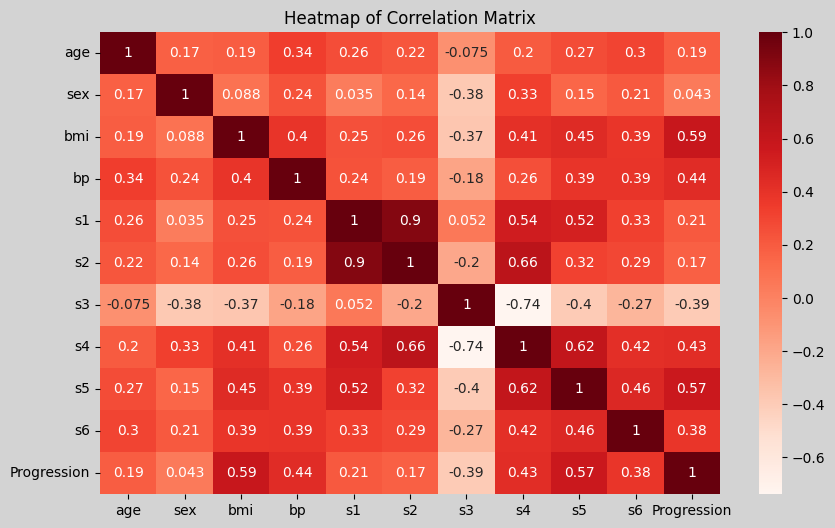

In [17]:
# Plotting heatmap of correlation matrix
plt.figure(figsize=(10, 6), facecolor='lightgray')
sns.heatmap(correlation_matrix, annot=True, cmap='Reds')
plt.title('Heatmap of Correlation Matrix')
plt.show()

<p>The <b>Heatmap</b> is the graphical visualization of the correlation matrix. Here, we measure the correlation of each feature with the target output variable (Progression). 

We can see that the age, sex, s1 and s2 doesnot have much of a correlation with target variable (the impact is very small) whereas bmi, bp, s4 and s5 have stronger positive correlation and s3 have stronger negative correlation with target variable (more impact on output). 

Now to further preprocess the data, lets see the scatterness of each data feature. </p>

<h3><ul>
    <li>Plotting the Box Plots</li>
</ul></h3>

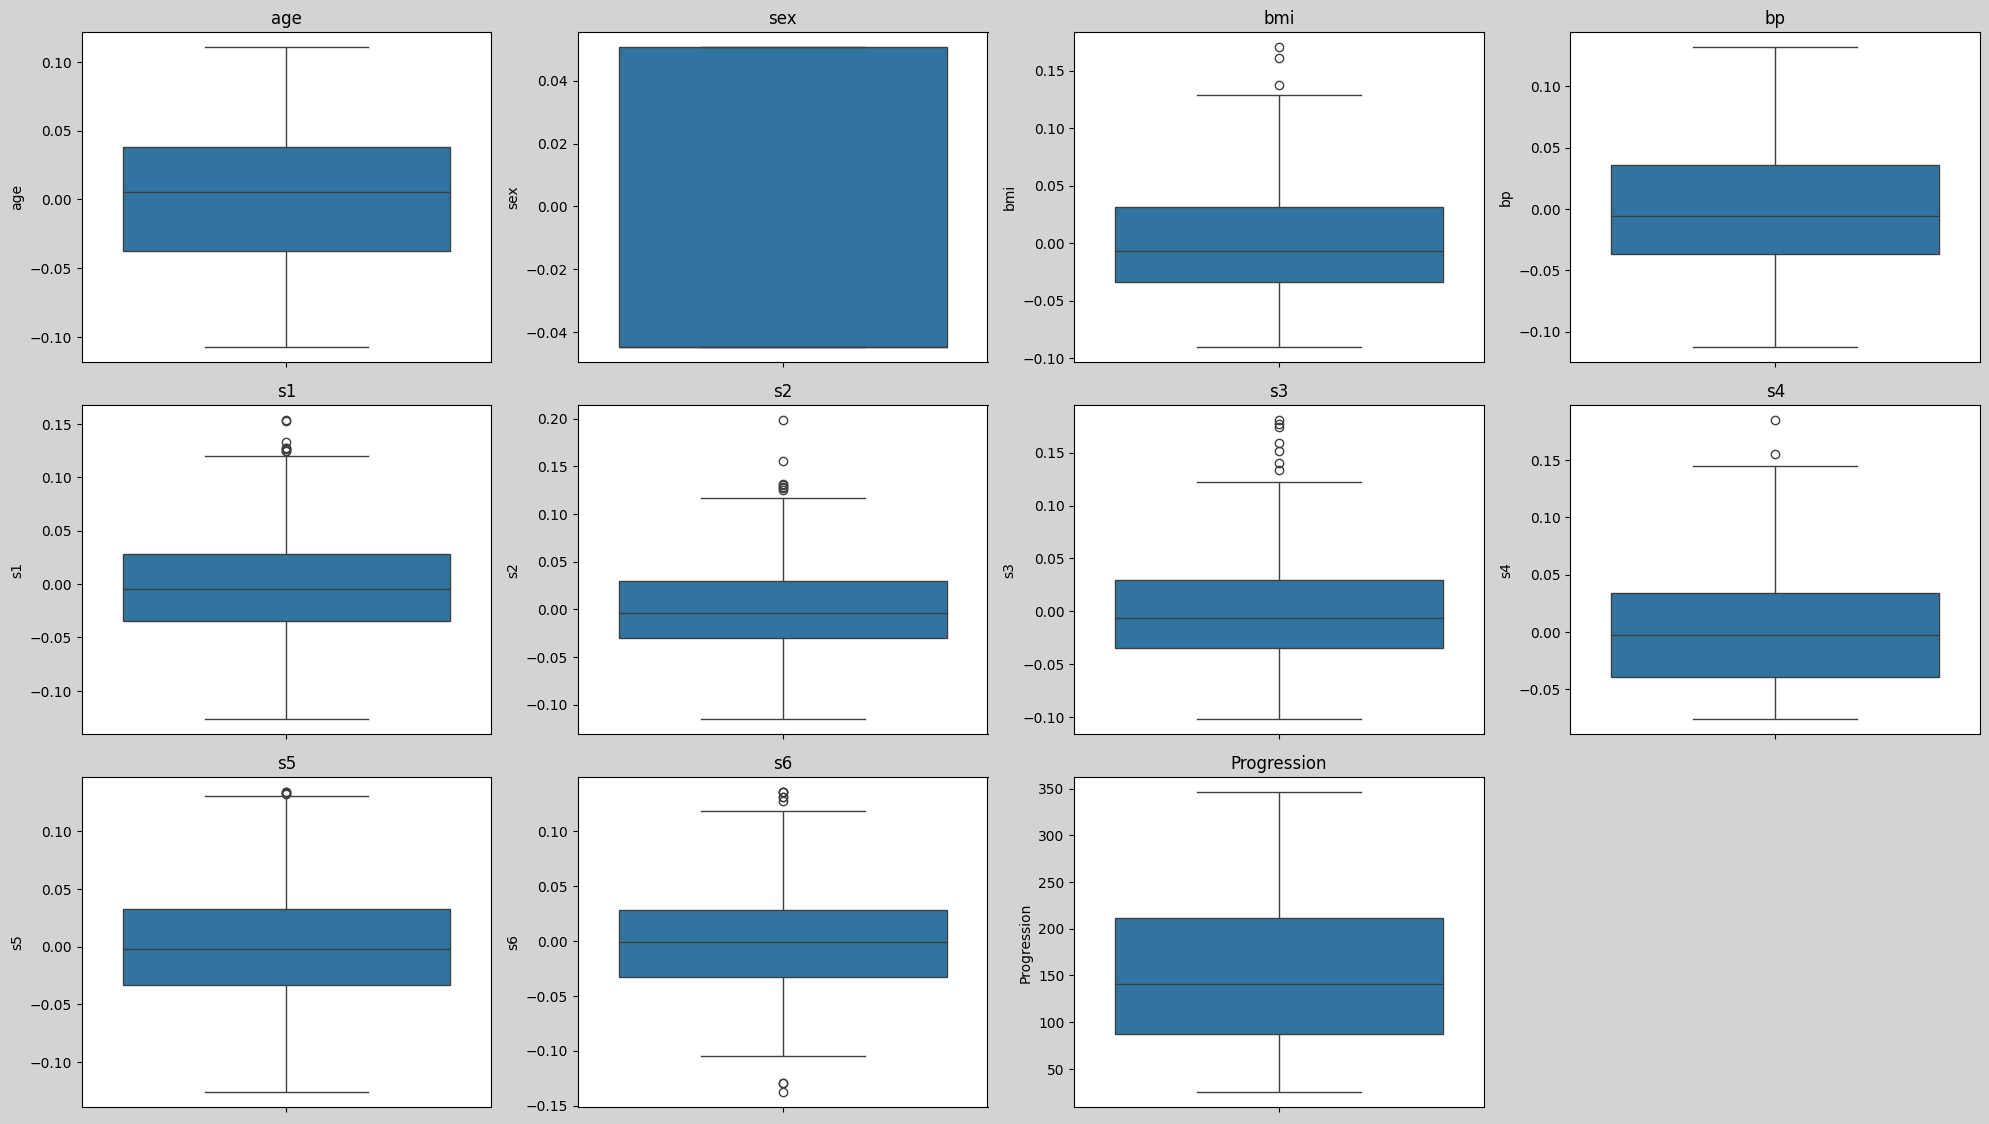

In [18]:
# Plotting box plots for each feature
plt.figure(figsize=(20, 15), facecolor='lightgray')

# Loop through each feature in the dataset
for i, feature in enumerate(dataset.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(dataset[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

<p>The <b>Boxplot</b> provide a graphical summary of the distribution of a dataset and is very helpful in predicting the outliers in the dataset. The features of box plot are as follows: 

<b>1. Median:</b> The line in the middle of the box represents the median (50th percentile) of the data.<br>
<b>2. Interquartile Range (IQR):</b> The box represents the interquartile range, which contains the middle 50% of the data. The bottom and top of the box are the 25th (Q1) and 75th (Q3) percentiles, respectively.<br>
<b>3. Whiskers:</b> The lines extending from the box (whiskers) show the range of the data within 1.5 times the IQR from Q1 and Q3. They indicate the spread of the data beyond the IQR.<br>
<b>4. Outliers:</b> Data points outside the whiskers are considered outliers and are often plotted as individual points. Outliers indicate variability in the data and can be useful for identifying unusual observations.<br>

-> The plot clearly shows that the sex feature is most scattered and it doesnot even have a median value. The s2 and s3 features are not much scattered but they have outliers. So, sex, s2 and s3 should be removed from the dataset.</p>

<h3><ul>
    <li>Plotting the Scatter Plots</li>
</ul></h3>

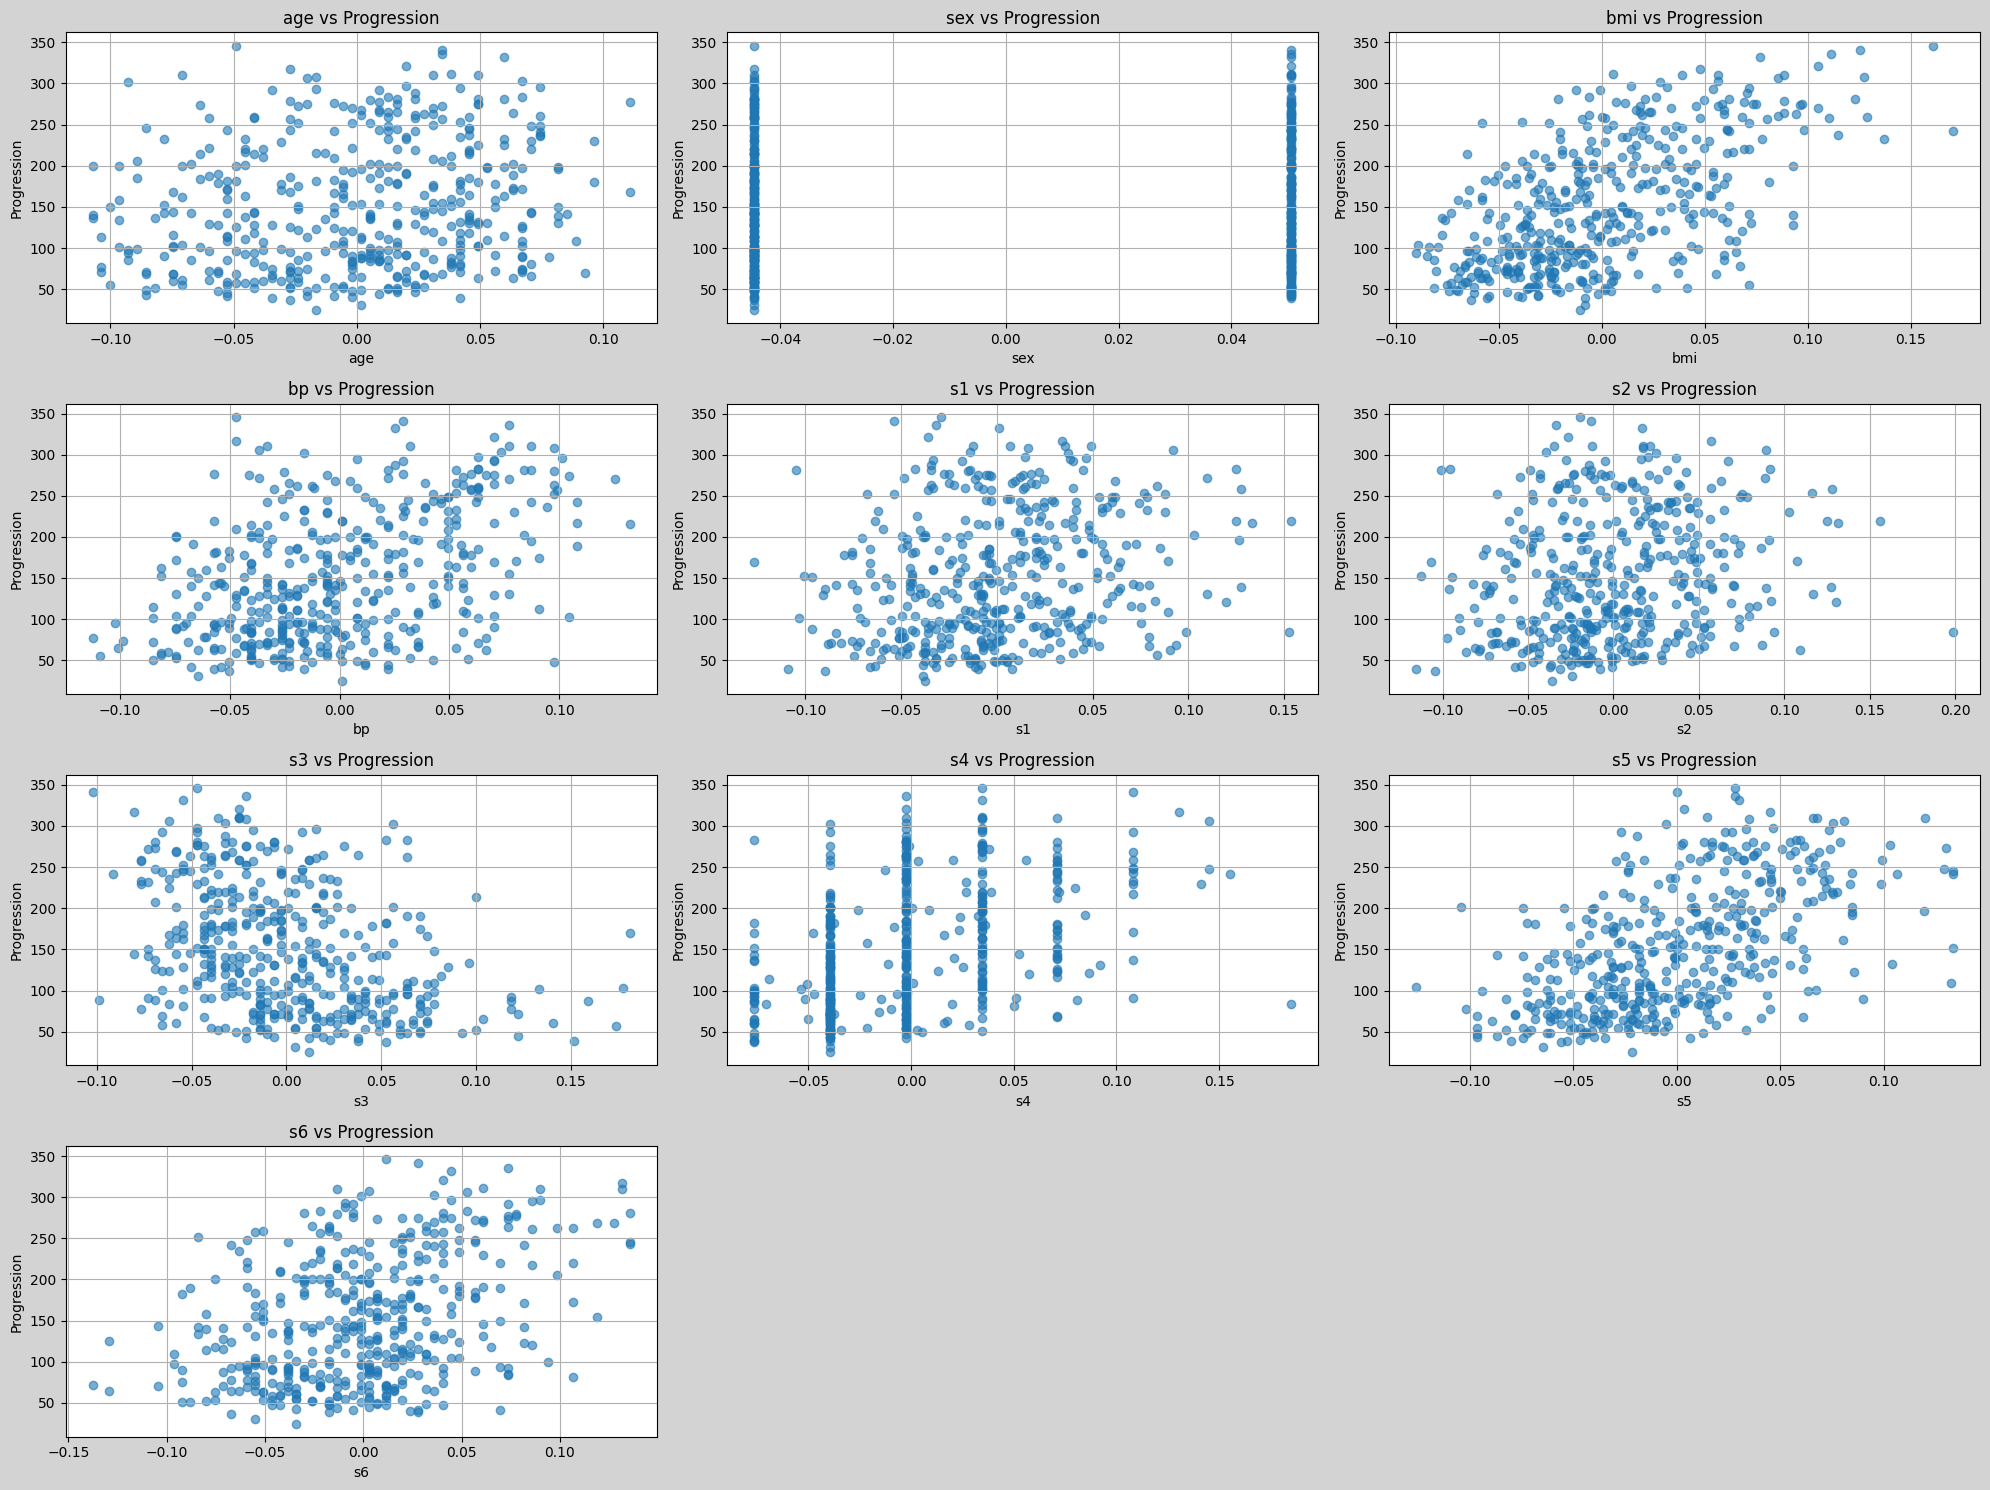

In [19]:
# Plotting scatter plots for each feature against Progression after normalization
plt.figure(figsize=(20, 15), facecolor='lightgray')

# Loop through each feature in the dataset
for i, feature in enumerate(dataset.columns[:-1], 1):  # Exclude the last column (Progression)
    plt.subplot(4, 3, i)
    plt.scatter(dataset[feature], dataset['Progression'], alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel('Progression')
    plt.title(f'{feature} vs Progression')
    plt.grid(True)

plt.tight_layout()
plt.show()

<p>The <b>Scatter plot</b> provides the relationship between two variables and also visualizes data distribution. It helps in visualizing the positive, negative or no correlation of variable with the output variable.

-> Clearly, the sex feature is most scattered and has no correlation with the target variable. The age, s1 and s2 features are also fairly scattered and seems to have no correlation with the target variable (again consistent with the heatmap). </p>

<h2>Feature Engineering</h2>
<h3><ul>
    <li>Dropping Features</li>
</ul></h3>
<p>So from above preprocessing, the sex feature is the best candidate to be dropped out because it is most scattered, has nearly zero correlation with the target variable and doesnot have much impact on it.</p>

In [20]:
# Dropping the less useful features
dataset = dataset.drop(['sex'], axis=1)
dataset.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


<h3><ul>
    <li>Normalizing Variables</li>
</ul></h3>
<p><b>Normalizing variables</b> is a technique in ML models to enhance their performance by making the data consistent and standard. It makes the mean of variables approximately zero and the standard deviation equals to one.

We now normalize variables s1 to s6 to make them consistent and less deviated</p>

In [21]:
# Normalize the s1 to s6 variables using the Z-score method
s_variables = ['s1', 's2', 's3', 's4', 's5', 's6']
dataset[s_variables] = dataset[s_variables].apply(zscore)

In [22]:
dataset.describe()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,-2.245564e-16,-4.797570e-17,-8.037814e-18,0.000000,0.000000,1.607563e-17,-8.037814e-18,-1.607563e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,1.001133e+00,1.001133,1.001133,1.001133e+00,1.001133e+00,1.001133e+00,77.093005
min,-1.072256e-01,-9.027530e-02,-1.123988e-01,-2.665411e+00,-2.430626,-2.150883,-1.606102e+00,-2.651040e+00,-2.896390e+00,25.000000
25%,-3.729927e-02,-3.422907e-02,-3.665608e-02,-7.200196e-01,-0.638249,-0.738296,-8.303008e-01,-6.989486e-01,-6.975491e-01,87.000000
50%,5.383060e-03,-7.283766e-03,-5.670422e-03,-9.084100e-02,-0.080291,-0.138431,-5.449919e-02,-4.093693e-02,-2.265729e-02,140.500000
75%,3.807591e-02,3.124802e-02,3.564379e-02,5.961931e-01,0.627442,0.616239,7.213025e-01,6.818506e-01,5.869224e-01,211.500000
max,1.107267e-01,1.705552e-01,1.320436e-01,3.235851e+00,4.179278,3.809072,3.894331e+00,2.808722e+00,2.851075e+00,346.000000


<h2>Dataset Splitting after Feature Engineering</h2>

In [23]:
# Selecting the independent variable (X) and dependent variable (Y)
Xf = dataset.drop('Progression', axis=1)
Yf = dataset['Progression']

# Splitting the dataset into 80/20 ratio of train and test data
Xf_train, Xf_test, Yf_train, Yf_test = train_test_split(Xf, Yf, test_size=0.2, random_state=42)

<h2>Linear Regression Model after Feature Engineering</h2>
<h3><ul>
    <li>Fitting/Training the Model</li>
</ul></h3>

In [24]:
# Training the model on train data on new data
lr_model.fit(Xf_train, Yf_train)

LinearRegression()

<h3><ul>
    <li>Predicting the Result</li>
</ul></h3>

In [25]:
# Predicting the target variable
Yf_pred = lr_model.predict(Xf_test)

<h3><ul>
    <li>Evaluating the model</li>
</ul></h3>
<h4><pre>    1. Calculating the Score of Model on Training Data</pre></h4>

In [26]:
# Printing the score of trained model on test data
lr_model.score(Xf_train, Yf_train)

0.5107312251753249

<h4><pre>    2. Calculating the Score of Model on Test Data</pre></h4>

In [27]:
# Printing the score of trained model on test data
lr_model.score(Xf_test, Yf_test)

0.43626889830955173

<p>The score of Model on training and test data remains approximately same i.e, the model still performs somewhat better on training data than on unseen test data and the values of score deosn't seems to change much.</p>

<h4><pre>    3. Calculating the Mean Squared Error (MSE) of Model</pre></h4>

In [28]:
# Calculating the MSE of the model
MSE = mean_squared_error(Yf_test, Yf_pred)
print("MSE: ", MSE)

MSE:  2986.732922114438


<h4><pre>    4. Calculating the R<sup>2</sup> score of Model</pre></h4>

In [29]:
# Calculating the R2 score of the model
r2 = r2_score(Yf_test, Yf_pred)
print("R2: ", r2)

R2:  0.43626889830955173


<p>The MSE and the R<sup>2</sup> score also doesn't changed. The mean squared error is still large indicating the outspread of data from the regression line and the R<sup>2</sup> score is still small indicating that the model still explains approximately the same variance as it did before the feature engineering. </p>

<h3><ul>
    <li>Visualizing the Model's Performance</li>
</ul></h3>
<h4><pre>     Plotting the Regression Line of Predicted and Actual values</pre></h4>

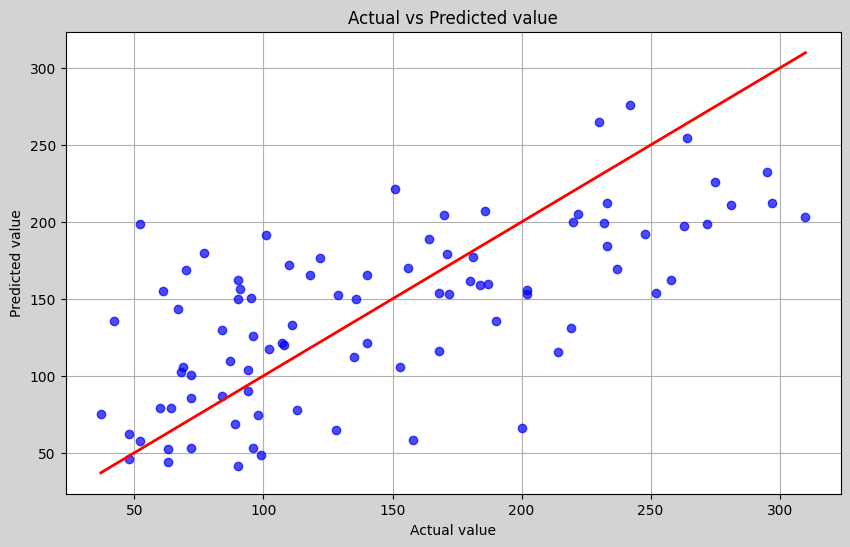

In [30]:
# Visualizing the model's performance by Regression Line after feature engineering
plt.figure(figsize=(10, 6), facecolor='lightgray')
plt.scatter(Yf_test, Yf_pred, color='blue', zorder=2, alpha=0.7)
plt.plot([min(Yf_test), max(Yf_test)], [min(Yf_test), max(Yf_test)], color='red', linewidth=2)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual vs Predicted value')
plt.grid(True, zorder=1)
plt.show()

<p>The graph on linear regression line is also the same indicating that the model still behaves the same way as it did before the feature engineering and normalization. </p>

<h2>Features Impact on Target Variable</h2>

In [31]:
# Printing the model's coefficient 
coefficients = pd.DataFrame(lr_model.coef_, Xf.columns, columns=['Coefficient'])
coefficients

,Coefficient
age,3.493899
bmi,590.239293
bp,304.219041
s1,-42.075008
s2,24.273270
s3,9.260771
s4,8.723337
s5,36.282812
s6,1.810479


In [32]:
# Impact of each feature on target variable
for feature in coefficients.index:
    coef = coefficients.loc[feature, 'Coefficient']
    impact = "increase" if coef > 0 else "decrease"
    print(f"-> A unit increase in {feature} will result in a {abs(coef):.2f} units {impact} in the target variable (Progression).")

-> A unit increase in age will result in a 3.49 units increase in the target variable (Progression).
-> A unit increase in bmi will result in a 590.24 units increase in the target variable (Progression).
-> A unit increase in bp will result in a 304.22 units increase in the target variable (Progression).
-> A unit increase in s1 will result in a 42.08 units decrease in the target variable (Progression).
-> A unit increase in s2 will result in a 24.27 units increase in the target variable (Progression).
-> A unit increase in s3 will result in a 9.26 units increase in the target variable (Progression).
-> A unit increase in s4 will result in a 8.72 units increase in the target variable (Progression).
-> A unit increase in s5 will result in a 36.28 units increase in the target variable (Progression).
-> A unit increase in s6 will result in a 1.81 units increase in the target variable (Progression).


<p>--> The key point here is that if the coefficient is positive, then it will result in increasing the target variable (directly proportional). <br>
But if the coefficient is negative, it will result in decreasing the target variable (inversely proportional) </p>

<h2><b>Conclusion</b></h2>
<p>The model performs the same before the feature engineering and after the feature engineering. The model score on training and test data, the mean squared error and R squared score doesn't seem to change much before and after. 
Therefore, this shows the <b>LINEAR REGRESSION</b> is not the best model to predict the diabetes progression. We can use <b>RANDOM FOREST REGRESSOR</b>, <b>LASSO REGRESSION</b> or <b>RIDGE REGRESSION</b> to increase the model's performance and accuracy in prediction of Diabetes Progression.</p>